In [1]:
!pip install kaggle
"""
To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. 
Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and select 'Create API Token'. 
This will trigger the download of kaggle.json, a file containing your API credentials.
Upload that file to google colab/google cloud platform 
"""
api_token = {"username":"surabhimv","key":"6486570e714dc5adf89e540c7913012d"}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c 'telstra-recruiting-network'



  0% 0.00/557k [00:00<?, ?B/s]
100% 557k/557k [00:00<00:00, 96.8MB/s]


In [3]:
!unzip telstra-recruiting-network.zip

Archive:  telstra-recruiting-network.zip
  inflating: event_type.csv.zip      
  inflating: log_feature.csv.zip     
  inflating: resource_type.csv.zip   
  inflating: sample_submission.csv.zip  
  inflating: severity_type.csv.zip   
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [5]:
!unzip event_type.csv.zip

Archive:  event_type.csv.zip
replace event_type.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
!unzip log_feature.csv.zip

Archive:  log_feature.csv.zip
replace log_feature.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
!unzip resource_type.csv.zip

Archive:  resource_type.csv.zip
replace resource_type.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
!unzip severity_type.csv.zip

Archive:  severity_type.csv.zip
replace severity_type.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
!unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [15]:
!unzip test.csv.zip

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [16]:
import pandas as pd
df1=pd.read_csv('event_type.csv')
print(df1)

         id     event_type
0      6597  event_type 11
1      8011  event_type 15
2      2597  event_type 15
3      5022  event_type 15
4      5022  event_type 11
...     ...            ...
31165  3761  event_type 11
31166  8720  event_type 11
31167  6488  event_type 11
31168   878  event_type 11
31169  4464  event_type 11

[31170 rows x 2 columns]


In [17]:
df2=pd.read_csv('log_feature.csv')
print(df2)

         id  log_feature  volume
0      6597   feature 68       6
1      8011   feature 68       7
2      2597   feature 68       1
3      5022  feature 172       2
4      5022   feature 56       1
...     ...          ...     ...
58666  8720  feature 209       1
58667  6488   feature 54       3
58668   878   feature 62       1
58669  4464  feature 209       1
58670  4464   feature 87       2

[58671 rows x 3 columns]


In [18]:
df3=pd.read_csv('resource_type.csv')
print(df3)

         id    resource_type
0      6597  resource_type 8
1      8011  resource_type 8
2      2597  resource_type 8
3      5022  resource_type 8
4      6852  resource_type 8
...     ...              ...
21071  3761  resource_type 8
21072  8720  resource_type 8
21073  6488  resource_type 8
21074   878  resource_type 8
21075  4464  resource_type 8

[21076 rows x 2 columns]


In [19]:
df3['resource_type'].unique()

array(['resource_type 8', 'resource_type 2', 'resource_type 1',
       'resource_type 9', 'resource_type 6', 'resource_type 7',
       'resource_type 10', 'resource_type 4', 'resource_type 3',
       'resource_type 5'], dtype=object)

In [20]:
dummies = pd.get_dummies(df3.resource_type)  
print(dummies)

       resource_type 1  resource_type 10  resource_type 2  resource_type 3  \
0                    0                 0                0                0   
1                    0                 0                0                0   
2                    0                 0                0                0   
3                    0                 0                0                0   
4                    0                 0                0                0   
...                ...               ...              ...              ...   
21071                0                 0                0                0   
21072                0                 0                0                0   
21073                0                 0                0                0   
21074                0                 0                0                0   
21075                0                 0                0                0   

       resource_type 4  resource_type 5  resource_type 6  resou

In [21]:
df3 = pd.concat([df3,dummies],axis=1) 
print(df3)

         id    resource_type  resource_type 1  resource_type 10  \
0      6597  resource_type 8                0                 0   
1      8011  resource_type 8                0                 0   
2      2597  resource_type 8                0                 0   
3      5022  resource_type 8                0                 0   
4      6852  resource_type 8                0                 0   
...     ...              ...              ...               ...   
21071  3761  resource_type 8                0                 0   
21072  8720  resource_type 8                0                 0   
21073  6488  resource_type 8                0                 0   
21074   878  resource_type 8                0                 0   
21075  4464  resource_type 8                0                 0   

       resource_type 2  resource_type 3  resource_type 4  resource_type 5  \
0                    0                0                0                0   
1                    0                0  

In [22]:
df4=pd.read_csv('severity_type.csv')
print(df4)

         id    severity_type
0      6597  severity_type 2
1      8011  severity_type 2
2      2597  severity_type 2
3      5022  severity_type 1
4      6852  severity_type 1
...     ...              ...
18547  3761  severity_type 1
18548  8720  severity_type 1
18549  6488  severity_type 2
18550   878  severity_type 2
18551  4464  severity_type 1

[18552 rows x 2 columns]


In [23]:
df4['severity_type'].unique()


array(['severity_type 2', 'severity_type 1', 'severity_type 4',
       'severity_type 5', 'severity_type 3'], dtype=object)

In [24]:
dummies1 = pd.get_dummies(df4.severity_type)  
print(dummies1)

       severity_type 1  severity_type 2  severity_type 3  severity_type 4  \
0                    0                1                0                0   
1                    0                1                0                0   
2                    0                1                0                0   
3                    1                0                0                0   
4                    1                0                0                0   
...                ...              ...              ...              ...   
18547                1                0                0                0   
18548                1                0                0                0   
18549                0                1                0                0   
18550                0                1                0                0   
18551                1                0                0                0   

       severity_type 5  
0                    0  
1                    0  


In [25]:
df4= pd.concat([df4,dummies1],axis=1) 
print(df4)

         id    severity_type  severity_type 1  severity_type 2  \
0      6597  severity_type 2                0                1   
1      8011  severity_type 2                0                1   
2      2597  severity_type 2                0                1   
3      5022  severity_type 1                1                0   
4      6852  severity_type 1                1                0   
...     ...              ...              ...              ...   
18547  3761  severity_type 1                1                0   
18548  8720  severity_type 1                1                0   
18549  6488  severity_type 2                0                1   
18550   878  severity_type 2                0                1   
18551  4464  severity_type 1                1                0   

       severity_type 3  severity_type 4  severity_type 5  
0                    0                0                0  
1                    0                0                0  
2                    0        

In [26]:
df5=pd.read_csv('train.csv')
print(df5)

         id       location  fault_severity
0     14121   location 118               1
1      9320    location 91               0
2     14394   location 152               1
3      8218   location 931               1
4     14804   location 120               0
...     ...            ...             ...
7376    870   location 167               0
7377  18068   location 106               0
7378  14111  location 1086               2
7379  15189     location 7               0
7380  17067   location 885               0

[7381 rows x 3 columns]


In [27]:
df=pd.read_csv('test.csv')
print(df)

          id       location
0      11066   location 481
1      18000   location 962
2      16964   location 491
3       4795   location 532
4       3392   location 600
...      ...            ...
11166  14806  location 1073
11167   1825    location 11
11168   2374   location 917
11169   7277   location 208
11170   9886   location 438

[11171 rows x 2 columns]


In [ ]:

"""d=df4['severity_type'].values
s=[]
print(d)
for i in d:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s.append(int(q1))

df4['severity_type']=s
print(df4)"""



['severity_type 2' 'severity_type 2' 'severity_type 2' ...
 'severity_type 2' 'severity_type 2' 'severity_type 1']
         id  severity_type
0      6597              2
1      8011              2
2      2597              2
3      5022              1
4      6852              1
...     ...            ...
18547  3761              1
18548  8720              1
18549  6488              2
18550   878              2
18551  4464              1

[18552 rows x 2 columns]


In [ ]:
"""
d1=df3['resource_type'].values
s1=[]

for i in d1:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s1.append(int(q1))

df3['resource_type']=s1
print(df3)"""

         id  resource_type
0      6597              8
1      8011              8
2      2597              8
3      5022              8
4      6852              8
...     ...            ...
21071  3761              8
21072  8720              8
21073  6488              8
21074   878              8
21075  4464              8

[21076 rows x 2 columns]


In [28]:
import re
d2=df2['log_feature'].values
s2=[]

for i in d2:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s2.append(int(q1))

df2['log_feature']=s2
print(df2)

         id  log_feature  volume
0      6597           68       6
1      8011           68       7
2      2597           68       1
3      5022          172       2
4      5022           56       1
...     ...          ...     ...
58666  8720          209       1
58667  6488           54       3
58668   878           62       1
58669  4464          209       1
58670  4464           87       2

[58671 rows x 3 columns]


In [29]:
import re
d1=df1['event_type'].values
s3=[]

for i in d1:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s3.append(int(q1))

df1['event_type']=s3
print(df1)

         id  event_type
0      6597          11
1      8011          15
2      2597          15
3      5022          15
4      5022          11
...     ...         ...
31165  3761          11
31166  8720          11
31167  6488          11
31168   878          11
31169  4464          11

[31170 rows x 2 columns]


In [30]:

d5=df5['location'].values
s5=[]

for i in d5:
  q=re.findall(r'\d+',i)
  q1=''.join(q)
  s5.append(int(q1))

df5['location']=s5
print(df5)

         id  location  fault_severity
0     14121       118               1
1      9320        91               0
2     14394       152               1
3      8218       931               1
4     14804       120               0
...     ...       ...             ...
7376    870       167               0
7377  18068       106               0
7378  14111      1086               2
7379  15189         7               0
7380  17067       885               0

[7381 rows x 3 columns]


In [31]:
dff= pd.merge(df1,df2,on='id')
dff1=pd.merge(dff,df3,on='id')
dff2=pd.merge(dff1,df4,on='id')
dff3=pd.merge(dff2,df5,on='id')

dff3=dff3.sort_values(['log_feature'],ascending = [True])
print(dff3)

          id  event_type  log_feature  volume    resource_type  \
61369   2123           2            1       1  resource_type 8   
2078   13382          28            1       1  resource_type 9   
2077   13382          28            1       1  resource_type 8   
2066   13382           2            1       1  resource_type 9   
2065   13382           2            1       1  resource_type 8   
...      ...         ...          ...     ...              ...   
19609   7378          20          383       1  resource_type 8   
19607   7378          20          383       1  resource_type 3   
376     4630           1          384       2  resource_type 8   
370     4630          11          384       2  resource_type 8   
364     4630          15          384       2  resource_type 8   

       resource_type 1  resource_type 10  resource_type 2  resource_type 3  \
61369                0                 0                0                0   
2078                 0                 0           

In [32]:
dff3=dff3.drop(['severity_type','resource_type'],axis=1)
print(dff3)

          id  event_type  log_feature  volume  resource_type 1  \
61369   2123           2            1       1                0   
2078   13382          28            1       1                0   
2077   13382          28            1       1                0   
2066   13382           2            1       1                0   
2065   13382           2            1       1                0   
...      ...         ...          ...     ...              ...   
19609   7378          20          383       1                0   
19607   7378          20          383       1                0   
376     4630           1          384       2                0   
370     4630          11          384       2                0   
364     4630          15          384       2                0   

       resource_type 10  resource_type 2  resource_type 3  resource_type 4  \
61369                 0                0                0                0   
2078                  0                0           

In [33]:
#EDA
dff3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 61369 to 364
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61839 non-null  int64
 1   event_type        61839 non-null  int64
 2   log_feature       61839 non-null  int64
 3   volume            61839 non-null  int64
 4   resource_type 1   61839 non-null  uint8
 5   resource_type 10  61839 non-null  uint8
 6   resource_type 2   61839 non-null  uint8
 7   resource_type 3   61839 non-null  uint8
 8   resource_type 4   61839 non-null  uint8
 9   resource_type 5   61839 non-null  uint8
 10  resource_type 6   61839 non-null  uint8
 11  resource_type 7   61839 non-null  uint8
 12  resource_type 8   61839 non-null  uint8
 13  resource_type 9   61839 non-null  uint8
 14  severity_type 1   61839 non-null  uint8
 15  severity_type 2   61839 non-null  uint8
 16  severity_type 3   61839 non-null  uint8
 17  severity_type 4   61839 non-n

In [34]:
dff3.describe()

,id,event_type,log_feature,volume,resource_type 1,resource_type 10,resource_type 2,resource_type 3,resource_type 4,resource_type 5,...,resource_type 7,resource_type 8,resource_type 9,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5,location,fault_severity
count,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,...,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000,61839.000000
mean,9104.379469,24.887482,211.245411,8.390336,0.010463,0.007293,0.513365,0.011708,0.031129,0.001924,...,0.046896,0.323501,0.013115,0.591391,0.392309,0.000534,0.014877,0.000889,580.234836,0.549168
std,5387.274195,12.007950,94.919318,22.902491,0.101751,0.085089,0.499825,0.107568,0.173668,0.043826,...,0.211418,0.467816,0.113767,0.491581,0.488269,0.023095,0.121063,0.029810,318.089156,0.727701
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4353.000000,13.000000,134.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,304.000000,0.000000
50%,8981.000000,23.000000,228.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,607.000000,0.000000
75%,13664.000000,35.000000,306.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,834.000000,1.000000
max,18550.000000,54.000000,384.000000,877.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1126.000000,2.000000


In [35]:
dff3.isnull().value_counts()

id     event_type  log_feature  volume  resource_type 1  resource_type 10  resource_type 2  resource_type 3  resource_type 4  resource_type 5  resource_type 6  resource_type 7  resource_type 8  resource_type 9  severity_type 1  severity_type 2  severity_type 3  severity_type 4  severity_type 5  location  fault_severity
False  False       False        False   False            False             False            False            False            False            False            False            False            False            False            False            False            False            False            False     False             61839
dtype: int64

In [36]:
dff3['fault_severity'].value_counts()                                           #data is imbalanced

0    36597
1    16524
2     8718
Name: fault_severity, dtype: int64

In [37]:
dff3.shape

(61839, 21)

In [38]:
dff3.corr()['fault_severity']

id                 -0.045528
event_type         -0.262184
log_feature        -0.208400
volume             -0.027196
resource_type 1     0.066544
resource_type 10    0.005569
resource_type 2    -0.335982
resource_type 3     0.048632
resource_type 4     0.081235
resource_type 5     0.087544
resource_type 6     0.098407
resource_type 7     0.059011
resource_type 8     0.221832
resource_type 9     0.016139
severity_type 1     0.365011
severity_type 2    -0.354763
severity_type 3    -0.017438
severity_type 4    -0.045933
severity_type 5    -0.008352
location            0.270390
fault_severity      1.000000
Name: fault_severity, dtype: float64

In [39]:
dff3['fault_severity'].unique()

array([1, 2, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'tsne')]

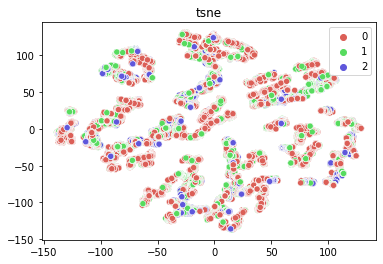

In [ ]:
#TSNE                                                                           #https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html
from sklearn.manifold import TSNE
import seaborn as sns
xtsne=TSNE(perplexity=200,learning_rate=1000,n_iter=6000)
results=xtsne.fit_transform(dff3.drop(['fault_severity'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
data_y =dff3['fault_severity']

sns.scatterplot(vis_x,vis_y, hue=data_y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=dff3).set(title="tsne")

In [ ]:
#pair plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(dff3, hue="fault_severity",palette='Dark2')
plt.show()

from the above observation, resource type and severity type pairplot points are well separated than others.

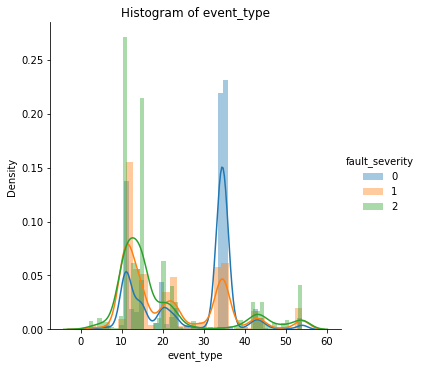

In [ ]:
import seaborn as sns
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot, "event_type") \
   .add_legend();
plt.title('Histogram of event_type') 
plt.show();

from this observation,density of points at lower event_type shows fault_severity(2) more and as the event_type increases btw(30 and 40) fault_severity(0) is more.

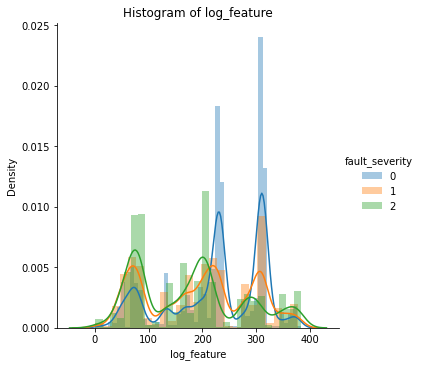

In [ ]:
import seaborn as sns
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot, "log_feature") \
   .add_legend();
plt.title('Histogram of log_feature') 
plt.show();

fault severity (0,1,2) are overlapping more but density of log feature points at(300)has (fault_severity 0) more.

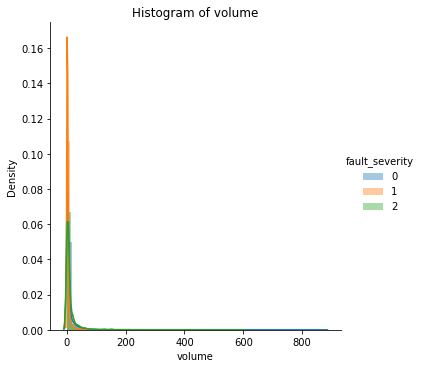

In [ ]:
import seaborn as sns
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot,'volume') \
   .add_legend();
plt.title('Histogram of volume') 
plt.show();

density of points at lesser volume has fault_severity (1) high.

density of points at lesser resource_type has higher fault_severity(0).also fault_severity(0,1,2) are less overlapping so this feature is useful in predicting the output.

density of points at lower severity type has fault severit(2) is more.

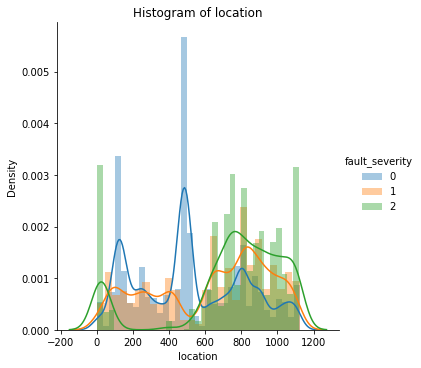

In [ ]:
sns.FacetGrid(dff3, hue="fault_severity", size=5) \
   .map(sns.distplot,'location') \
   .add_legend();
plt.title('Histogram of location') 
plt.show();

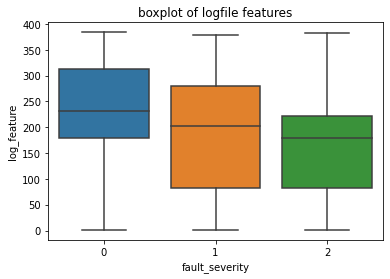

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt                                                 #boxplot representation of feature log_feature
ax = sns.boxplot(x="fault_severity", y="log_feature", data=dff3)                
plt.title("boxplot of logfile features")
plt.show()

In [ ]:
import numpy as np                                                              #https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
Q1 = np.percentile(dff3['log_feature'], 25,                                     #to detect and remove outliers
                   interpolation = 'midpoint')                   
 
Q3 = np.percentile(dff3['log_feature'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(dff3['log_feature'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(dff3['log_feature'] <= (Q1-1.5*IQR))
dff3.drop(upper[0],inplace=True)
dff3.drop(lower[0],inplace=True)

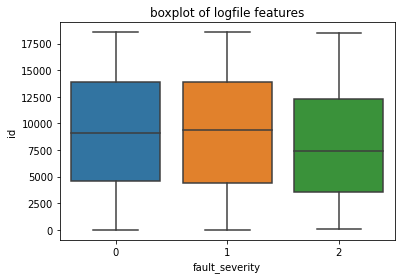

In [ ]:
ax = sns.boxplot(x="fault_severity", y="id", data=dff3)                         ##boxplot representation of feature id
plt.title("boxplot of logfile features")
plt.show()

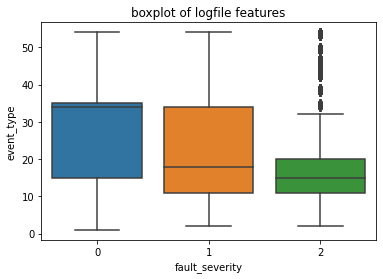

In [ ]:
ax = sns.boxplot(x="fault_severity", y="event_type", data=dff3)                 ##boxplot representation of feature event_type
plt.title("boxplot of logfile features")
plt.show()

In [ ]:
                 
Q1 = np.percentile(dff3['event_type'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dff3['event_type'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(dff3['event_type'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(dff3['event_type'] <= (Q1-1.5*IQR))
dff3.drop(upper[0],inplace=True)
dff3.drop(lower[0],inplace=True)

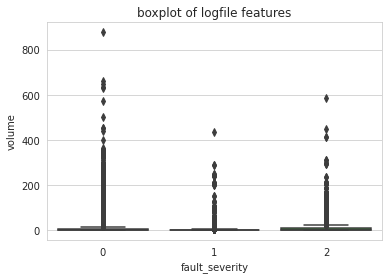

In [ ]:
ax = sns.boxplot(x="fault_severity", y="volume", data=dff3)                   #boxplot representation of feature location
plt.title("boxplot of logfile features")
plt.show()

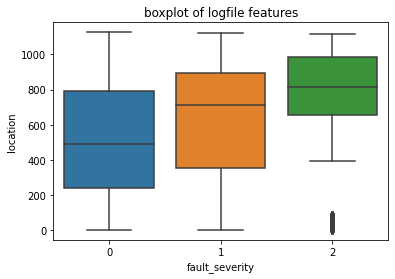

In [ ]:
ax = sns.boxplot(x="fault_severity", y="location", data=dff3)                   #boxplot representation of feature location
plt.title("boxplot of logfile features")
plt.show()

In [ ]:
Q1 = np.percentile(dff3['location'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(dff3['location'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(dff3['location'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dff3['location'] <= (Q1-1.5*IQR))
dff3.drop(upper[0], inplace = True)
dff3.drop(lower[0], inplace = True)

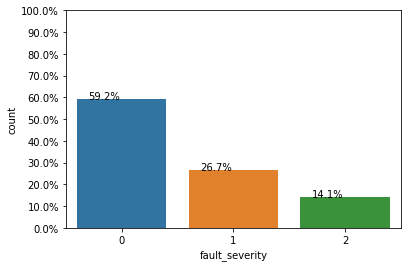

In [ ]:
import numpy as np                                                              #distribution of fault_severity
total = len(dff3)*1.
ax=sns.countplot(x="fault_severity", data=dff3)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [40]:
y=dff3['fault_severity']
X=dff3.drop(['fault_severity'],axis=1)
print(X)
print(y)

          id  event_type  log_feature  volume  resource_type 1  \
61369   2123           2            1       1                0   
2078   13382          28            1       1                0   
2077   13382          28            1       1                0   
2066   13382           2            1       1                0   
2065   13382           2            1       1                0   
...      ...         ...          ...     ...              ...   
19609   7378          20          383       1                0   
19607   7378          20          383       1                0   
376     4630           1          384       2                0   
370     4630          11          384       2                0   
364     4630          15          384       2                0   

       resource_type 10  resource_type 2  resource_type 3  resource_type 4  \
61369                 0                0                0                0   
2078                  0                0           

In [41]:

aa=dff3.to_csv('new_dataset.csv')

In [42]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33,stratify=y)
Xtrain,Xcv,ytrain,ycv=train_test_split(Xtrain,ytrain,test_size=0.33,stratify=ytrain)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)
print(Xcv.shape)
print(ycv.shape)


(27759, 20)
(27759,)
(20407, 20)
(20407,)
(13673, 20)
(13673,)


In [43]:
import numpy as np
print(np.unique(ycv))
print(np.unique(ytest))
print(np.unique(ytrain))

[0 1 2]
[0 1 2]
[0 1 2]


In [44]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
         # if (str(feature_name) != str('id') and str(feature_name)!=str('fault_severity')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(Xtrain)
Xtrain1=result
print(Xtrain1.columns)

Index(['id', 'event_type', 'log_feature', 'volume', 'resource_type 1',
       'resource_type 10', 'resource_type 2', 'resource_type 3',
       'resource_type 4', 'resource_type 5', 'resource_type 6',
       'resource_type 7', 'resource_type 8', 'resource_type 9',
       'severity_type 1', 'severity_type 2', 'severity_type 3',
       'severity_type 4', 'severity_type 5', 'location'],
      dtype='object')


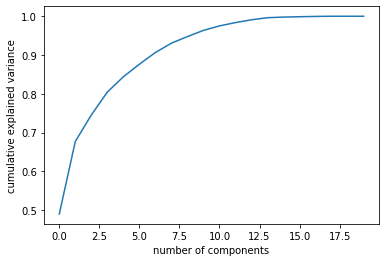

In [80]:
import matplotlib.pyplot as plt
pca = PCA()
principalComponents = pca.fit_transform(Xtrain1)
Xtrain2=principalComponents
cum_sum_exp=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(0,len(cum_sum_exp)),cum_sum_exp)                                 #ts#Choosing the number of components. this can be obtain by looking into  cumulative explained variance ratio
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');



*   first 3 components contain aprrox 60% of the variance
*   first 7 components contain approx 90% of the variance 

*   first 11 components contain approx 95% of the variance and rest of the components contain only 5% of variance(contain less information)


In [169]:
print(pca.explained_variance_ratio_)

[0.49050009 0.18679373 0.06823731 0.05908138 0.03937158 0.03233337
 0.03024587 0.02402726 0.01702695 0.01591674 0.01157802 0.00853473
 0.00723051 0.00537317]


In [164]:
y=dff3['fault_severity']
X=dff3.drop(['fault_severity','location'],axis=1)
print(X)
print(y)

          id  event_type  log_feature  volume  resource_type 1  \
61369   2123           2            1       1                0   
2078   13382          28            1       1                0   
2077   13382          28            1       1                0   
2066   13382           2            1       1                0   
2065   13382           2            1       1                0   
...      ...         ...          ...     ...              ...   
19609   7378          20          383       1                0   
19607   7378          20          383       1                0   
376     4630           1          384       2                0   
370     4630          11          384       2                0   
364     4630          15          384       2                0   

       resource_type 10  resource_type 2  resource_type 3  resource_type 4  \
61369                 0                0                0                0   
2078                  0                0           

In [165]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33,stratify=y)
Xtrain,Xcv,ytrain,ycv=train_test_split(Xtrain,ytrain,test_size=0.33,stratify=ytrain)

In [166]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
         # if (str(feature_name) != str('id') and str(feature_name)!=str('fault_severity')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(Xtrain)
Xtrain1=result
print(Xtrain1.columns)

Index(['id', 'event_type', 'log_feature', 'volume', 'resource_type 1',
       'resource_type 10', 'resource_type 2', 'resource_type 3',
       'resource_type 4', 'resource_type 5', 'resource_type 6',
       'resource_type 7', 'resource_type 8', 'resource_type 9',
       'severity_type 1', 'severity_type 2', 'severity_type 3',
       'severity_type 4', 'severity_type 5'],
      dtype='object')


In [ ]:
"""Xtrain1.isnull().mean()"""

id                  0.0
event_type          0.0
log_feature         0.0
volume              0.0
resource_type 1     0.0
resource_type 10    0.0
resource_type 2     0.0
resource_type 3     0.0
resource_type 4     0.0
resource_type 5     0.0
resource_type 6     0.0
resource_type 7     0.0
resource_type 8     0.0
resource_type 9     0.0
severity_type 1     0.0
severity_type 2     0.0
severity_type 3     0.0
severity_type 4     0.0
severity_type 5     0.0
location            0.0
dtype: float64

In [ ]:
"""Xtest.isnull().mean()"""

principal component 1    0.0
principal component 2    0.0
id                       0.0
event_type               0.0
log_feature              0.0
volume                   0.0
resource_type 1          0.0
resource_type 10         0.0
resource_type 2          0.0
resource_type 3          0.0
resource_type 4          0.0
resource_type 5          0.0
resource_type 6          0.0
resource_type 7          0.0
resource_type 8          0.0
resource_type 9          0.0
severity_type 1          0.0
severity_type 2          0.0
severity_type 3          0.0
severity_type 4          0.0
severity_type 5          0.0
location                 0.0
fault_severity           0.0
dtype: float64

In [ ]:
"""Xcv.isnull().mean()"""

principal component 1    0.0
principal component 2    0.0
id                       0.0
event_type               0.0
log_feature              0.0
volume                   0.0
resource_type 1          0.0
resource_type 10         0.0
resource_type 2          0.0
resource_type 3          0.0
resource_type 4          0.0
resource_type 5          0.0
resource_type 6          0.0
resource_type 7          0.0
resource_type 8          0.0
resource_type 9          0.0
severity_type 1          0.0
severity_type 2          0.0
severity_type 3          0.0
severity_type 4          0.0
severity_type 5          0.0
location                 0.0
fault_severity           0.0
dtype: float64

In [167]:
import warnings
warnings.filterwarnings("ignore")
from multiprocessing import Process# this is used for multithreading
import multiprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#random model
yy=ytrain.values                                                                
print(yy)

y1=yy.reshape(-1, 1)

print(y1)
from sklearn.preprocessing import OneHotEncoder
def ohe(x):
  onehot_encoder = OneHotEncoder(sparse=False)
  onehot_encoded = onehot_encoder.fit_transform(x)
  hp=onehot_encoded.astype(int)
  return  hp
l1=ohe(y1)
print(l1[0])
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = Xtest.shape[0]
cv_data_len = Xcv.shape[0]

yt=ytest.values.reshape(-1,1)
yc=ycv.values.reshape(-1,1)
yte=ohe(yt)                                                                     #encoded y_test values
yce=ohe(yc)                                                                     #encoded y_cv values

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,3))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,3)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(yce,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,3))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,3)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(yte,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)                                #Returns the indices of the maximum values along an axis.

C = confusion_matrix(ytest, predicted_y)

print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))
print('precision',B)

[0 1 2 ... 1 0 1]
[[0]
 [1]
 [2]
 ...
 [1]
 [0]
 [1]]
[1 0 0]
Log loss on Cross Validation Data using Random Model 1.3334218371646078
Log loss on Test Data using Random Model 1.3454495697543558
confusion [[4059 4075 3943]
 [1785 1808 1860]
 [ 993  968  916]]
****************************************************************************************************
recal [[0.3360934  0.33741823 0.32648837]
 [0.32734275 0.33156061 0.34109664]
 [0.3451512  0.33646159 0.31838721]]
****************************************************************************************************
precision [[0.59368144 0.59480368 0.58684328]
 [0.26107942 0.26390308 0.27682691]
 [0.14523914 0.14129324 0.13632981]]


In [ ]:
#knn
alpha = [x for x in range(1, 20, 4)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i,weights='distance')
    k_cfl.fit(Xtrain1,ytrain)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(Xtrain1, ytrain)
    predict_y = sig_clf.predict_proba(Xcv)
    cv_log_error_array.append(log_loss(ycv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
best_alpha = np.argmin(cv_log_error_array)
    



In [ ]:
k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(Xtrain1,ytrain)
sig_clf1 = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf1.fit(Xtrain1, ytrain)
    
predict_y = sig_clf1.predict_proba(Xtrain1)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(ytrain, predict_y))
predict_y = sig_clf1.predict_proba(Xcv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(ycv, predict_y))
predict_y = sig_clf1.predict_proba(Xtest)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(ytest, predict_y))



C = confusion_matrix(ytest, sig_clf1.predict(Xtest))
print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))
print('precision',B)

For values of best alpha =  1 The train log loss is: 0.39710374302815205
For values of best alpha =  1 The cross validation log loss is: 0.957273693631887
For values of best alpha =  1 The test log loss is: 0.9553196273337947
confusion [[8249 2526 1302]
 [2644 1955  854]
 [ 876 1253  748]]
****************************************************************************************************
recal [[0.68303387 0.2091579  0.10780823]
 [0.48487071 0.35851825 0.15661104]
 [0.30448384 0.43552311 0.25999305]]
****************************************************************************************************
precision [[0.70090917 0.44053017 0.44834711]
 [0.224658   0.34094873 0.29407713]
 [0.07443283 0.2185211  0.25757576]]


In [168]:
#logistic regression
alpha = [10 ** x for x in range(-10,1)]
print(alpha)
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l1',C=i,class_weight='balanced',solver='saga',n_jobs=-1)
    logisticR.fit(Xtrain1,ytrain)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(Xtrain1, ytrain)
    predict_y = sig_clf.predict_proba(Xcv)
    cv_log_error_array.append(log_loss(ycv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
best_alpha = np.argmin(cv_log_error_array)
    
logisticR=LogisticRegression(penalty='l1',C=alpha[best_alpha],class_weight='balanced',solver='saga',n_jobs=-1)
logisticR.fit(Xtrain1,ytrain)
sig_clf2 = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf2.fit(Xtrain1, ytrain)
pred_y=sig_clf2.predict(Xtest)

predict_y = sig_clf2.predict_proba(Xtrain1)
print ('For values of best alpha = ', alpha[best_alpha],'log loss for train data',log_loss(ytrain, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf2.predict_proba(Xcv)
print ('For values of best alpha = ', alpha[best_alpha],'log loss for cv data',log_loss(ycv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf2.predict_proba(Xtest)
print ('For values of best alpha = ', alpha[best_alpha],'log loss for test data',log_loss(ytest, predict_y, labels=logisticR.classes_, eps=1e-15))

C = confusion_matrix(ytest, sig_clf2.predict(Xtest))
print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))
print('precision',B)

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
For values of best alpha =  0.001 log loss for train data 0.8596200640045256
For values of best alpha =  0.001 log loss for cv data 0.8625811364164199
For values of best alpha =  0.001 log loss for test data 0.8599642698006663
confusion [[12077     0     0]
 [ 5453     0     0]
 [ 2877     0     0]]
****************************************************************************************************
recal [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
****************************************************************************************************
precision [[0.59180673        nan        nan]
 [0.26721223        nan        nan]
 [0.14098104        nan        nan]]


In [ ]:
#random forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'min_samples_split':[2,5,10],'max_depth':[1,5,10,20,50],'n_estimators':[10,100,500,1000,1200]}

r_cfl=RandomForestClassifier()
clf=RandomizedSearchCV(r_cfl,parameters, cv=10, scoring='roc_auc',n_jobs=4)
clf.fit(Xtrain1,ytrain)



KeyboardInterrupt: ignored

In [ ]:
print(clf.best_estimator_)

RandomForestClassifier(max_depth=50, min_samples_split=10, n_estimators=10)


In [ ]:
r_cfl=RandomForestClassifier(n_estimators=10,random_state=42,n_jobs=-1,class_weight='balanced_subsample',max_depth=50, min_samples_split=10)
r_cfl.fit(Xtrain1,ytrain)
sig_clf3 = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf3.fit(Xtrain1, ytrain)

predict_y = sig_clf3.predict_proba(Xtrain1)

print("The train log loss is:",log_loss(ytrain, predict_y))

predict_y = sig_clf3.predict_proba(Xtest)
print("The test log loss is:",log_loss(ytest, predict_y))
C = confusion_matrix(ytest, sig_clf3.predict(Xtest))
print('confusion',C)
print('*'*100)
A =(((C.T)/(C.sum(axis=1))).T)
print('recal',A)
print('*'*100)
B =(C/C.sum(axis=0))

The train log loss is: 0.2933148736070975
The test log loss is: 0.9580244208360646
confusion [[12004     0    73]
 [ 5416     0    37]
 [ 2795     0    82]]
****************************************************************************************************
recal [[0.99395545 0.         0.00604455]
 [0.99321474 0.         0.00678526]
 [0.97149809 0.         0.02850191]]
****************************************************************************************************


In [170]:
from prettytable import PrettyTable
myTable = PrettyTable(["Model", "best_value_of_alpha()", "train logloss","test logloss"])
myTable.add_row([ "Random_model", "0", "1.3334218371646078","1.3454495697543558"])
myTable.add_row([ "KNN", "13", "0.39710374302815205","0.9553196273337947"])
myTable.add_row([ "Logistic_Regression(using PCA)", "0.001", " 0.8596200640045256"," 0.8599642698006663"])
myTable.add_row(["Random_Forest", "d=50,s=10,e=10", "0.2933148736070975",'0.9580244208360646'])

print(myTable)

+--------------------------------+-----------------------+---------------------+---------------------+
|             Model              | best_value_of_alpha() |    train logloss    |     test logloss    |
+--------------------------------+-----------------------+---------------------+---------------------+
|          Random_model          |           0           |  1.3334218371646078 |  1.3454495697543558 |
|              KNN               |           13          | 0.39710374302815205 |  0.9553196273337947 |
| Logistic_Regression(using PCA) |         0.001         |  0.8596200640045256 |  0.8599642698006663 |
|         Random_Forest          |     d=50,s=10,e=10    |  0.2933148736070975 |  0.9580244208360646 |
+--------------------------------+-----------------------+---------------------+---------------------+
